## Εισάγετε τις βιβλιοθήκες που θα χρειαστείτε στη συνέχεια

In [1]:
import pandas as pd

## Ανοίξτε το αρχείο Marriages.csv και διαβάστε τις πέντε πρώτες σειρές

In [2]:
df = pd.read_csv("../data/marriages.csv")

In [3]:
df.head()

,Έτος,Γάμοι,"Γάμοι ανά 1,000"
0,1932,39283,6.00
1,1933,46263,6.98
2,1934,47301,7.03
3,1935,45690,6.68
4,1936,38750,5.59


## Πόσες είναι συνολικά οι σειρές σας; Και ποιο το είδος των στηλών σας;   

In [9]:
#rows count
len(df)

71

In [4]:
df.dtypes

Έτος                 int64
Γάμοι                int64
Γάμοι ανά 1,000    float64
dtype: object

## Ποιές είναι οι δέκα χρονιές με τους περισσότερους γάμους από το 1932;

In [45]:
df.sort_values(ascending=False,by='Γάμοι')['Έτος'].head(10)

21    1967
19    1965
33    1979
17    1963
29    1975
31    1977
18    1964
13    1959
27    1973
25    1971
Name: Έτος, dtype: int64

## Ποιές είναι οι δέκα χρονιές με τους λιγότερους γάμους ανά 1000 κατοίκους από το 1932;

In [24]:
df.sort_values(ascending=True,by='Γάμοι ανά 1,000')['Έτος'].head(10)

50    1996
66    2012
54    2000
8     1940
70    2016
67    2013
58    2004
46    1992
62    2008
42    1988
Name: Έτος, dtype: int64

## Απεικονίστε τον ρυθμό τέλεσης γάμων ανά 1,000 κατοίκους στην πιο πρόσφατη δεκαετία

In [25]:
%matplotlib inline

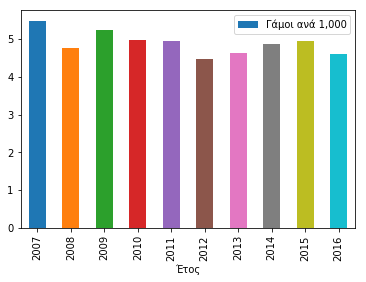

In [43]:
df.sort_values(ascending=True, by= 'Έτος').tail(10).plot(x='Έτος', y='Γάμοι ανά 1,000', kind='bar')

## Ανοίξτε το αρχείο Deaths.csv και διαβάστε τις πέντε τελευταίες σειρές

In [70]:
df2 = pd.read_csv("../data/deaths.csv")

In [71]:
df2.tail(5)

,Έτος,Θάνατοι,"Θάνατοι / 1,000",Θάνατοι κάτω 1,"Θάνατοι κάτω 1 / 1,000"
66,2012,116668,10.52,293,2.92
67,2013,111794,10.20,346,3.67
68,2014,113740,10.41,346,3.75
69,2015,121183,11.16,364,3.96
70,2016,118785,11.02,387,4.17


## Ποιές είναι οι δέκα χρονιές με τους περισσότερους θανάτους;

In [72]:
df2.sort_values(ascending=False, by='Θάνατοι')['Έτος'].head(10)

69    2015
70    2016
0     1932
66    2012
68    2014
67    2013
1     1933
65    2011
61    2007
64    2010
Name: Έτος, dtype: int64

## Ποιές ειναι οι δέκα χρονιές με τους περισσότερους θανάτους νεογνών;

In [73]:
df2.sort_values(ascending=False, by='Θάνατοι κάτω 1')['Έτος'].head(10)

44    1990
43    1989
45    1991
46    1992
47    1993
49    1995
48    1994
50    1996
11    1957
52    1998
Name: Έτος, dtype: int64

## Τι λάθος παρατηρείτε; Πώς μπορείτε να το διορθώσετε;

In [74]:
df2.dtypes
#Παρατηρούμε ότι οι στήλες "Θάνατοι κάτω 1" και "Θάνατοι κάτω 1/1,000" είναι τύπου Object (συμβολοσειρά)
#Επίσης πολλές τιμές είναι NaN και δε γίνεται σωστά η ταξινόμηση

Έτος                        int64
Θάνατοι                     int64
Θάνατοι / 1,000           float64
Θάνατοι κάτω 1             object
Θάνατοι κάτω 1 / 1,000     object
dtype: object

In [76]:
df2['Θάνατοι κάτω 1'] = df2['Θάνατοι κάτω 1'].apply(pd.to_numeric, errors='coerce') #object to float64
df2['Θάνατοι κάτω 1 / 1,000'] = df2['Θάνατοι κάτω 1 / 1,000'].apply(pd.to_numeric, errors='coerce') #object to float64

In [77]:
df2['Θάνατοι κάτω 1'] = df2['Θάνατοι κάτω 1'].fillna(0).astype(int)   #NaN to 0 && float64 to int64
df2['Θάνατοι κάτω 1 / 1,000'] = df2['Θάνατοι κάτω 1 / 1,000'].fillna(0)  #NaN to 0 

In [69]:
df2.dtypes

Έτος                        int64
Θάνατοι                     int64
Θάνατοι / 1,000           float64
Θάνατοι κάτω 1              int64
Θάνατοι κάτω 1 / 1,000    float64
dtype: object

## Απεικονίστε στο ίδιο διάγραμμα την διακύμανση των θανάτων ανά 1.000 άτομα και για τις δυο κατηγορίες έως το 1940

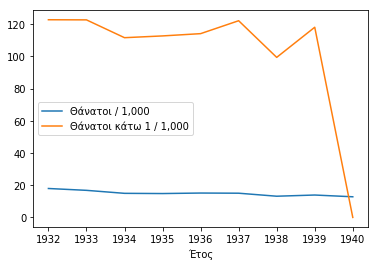

In [100]:
df2.head(9)[['Έτος', 'Θάνατοι / 1,000', 'Θάνατοι κάτω 1 / 1,000']].plot(x='Έτος') 
#διπλή αγκύλη και χωρισμένα με κόμμα αν θέλω να εμφανίσει παραπάνω από ένα